# CS0010 Final Project for Group 25

### [Click here for our group's GitHub Repo](https://github.com/boredhero/0010-final-project)

#### Introduction:

To determine the best neighborhood in Pittsburgh in a data-driven manner, we based our approach around the use of two metrics; the first filtered the neighborhoods to create a smaller subset, while the second was applied to the filtered group. An average of the values from the first and second metrics was then calculated to create a final percentage; the higher the percentage, the better the neighborhood.  As such, we settled on arrest rate and education level as our two metrics because they reveal important but very different things about a neighborhood.

#### Metric:

The first metric we used is the Pittsburgh Police Arrest Data (PPAD). To measure this, we used the PPAD database entries and counted/stored the number of arrests for each neighborhood over a period of approximately five years.  The count for each neighborhood was divided by its population and then multiplied by 100,000 to standardize the resulting arrest rate. This is then compared to the national arrest rate per 100,000  

The second metric we used was education level. An education was deemed to be sufficient when a person received a high school diploma. For this, we utilized a dataset containing educational attainment data for the population 25 years and over.  The number of people who at least completed high school and any further education was totaled for each neighborhood and divided by the given sample size in the dataset to come up with a resulting education rate. 

To use these metrics, we also have a database of the population of different neighborhoods in pittsburgh for context.

### Datasets

##### Total Population

##### Pittsburgh Police Arrest Data

##### Educational Attainment for the Population 25 & over 


#### The Best Neighborhood:

In [39]:
##Handle imports
import ssl
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
ssl._create_default_https_context = ssl._create_unverified_context
##Open our csv files
ppad = pd.read_csv("pittsburgh_police_arrest_data.csv")
pgh_pop = pd.read_csv("total_population.csv", index_col = 'Id')
edu_att = pd.read_csv("educational_attainment.csv")
##Display the first 10 rows of the educational attainment DB.
edu_att.head(10)

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - No schooling completed,Margin of Error; Total: - No schooling completed,Estimate; Total: - Nursery school,Margin of Error; Total: - Nursery school,Estimate; Total: - Kindergarten,Margin of Error; Total: - Kindergarten,...,Estimate; Total: - Associate's degree,Margin of Error; Total: - Associate's degree,Estimate; Total: - Bachelor's degree,Margin of Error; Total: - Bachelor's degree,Estimate; Total: - Master's degree,Margin of Error; Total: - Master's degree,Estimate; Total: - Professional school degree,Margin of Error; Total: - Professional school degree,Estimate; Total: - Doctorate degree,Margin of Error; Total: - Doctorate degree
0,Allegheny Center,1,1002,139.000000,10,14.000000,0,10.000000,0,10.000000,...,87,52.000000,274,77.000000,80,46.000000,125,66.000000,8,11.000000
1,Allegheny West,2,293,72.000000,0,10.000000,0,10.000000,0,10.000000,...,16,10.000000,88,34.000000,33,29.000000,27,31.000000,20,26.000000
2,Allentown,3,1577,227.187148,19,27.000000,0,17.320508,0,17.320508,...,54,34.871192,70,42.626283,35,29.529646,22,29.597297,0,17.320508
3,Arlington,4,1296,218.515446,31,32.878564,0,17.320508,0,17.320508,...,147,59.405387,94,43.127717,25,22.158520,4,15.779734,0,17.320508
4,Arlington Heights,5,121,63.000000,0,10.000000,0,10.000000,0,10.000000,...,0,10.000000,0,10.000000,0,10.000000,0,10.000000,0,10.000000
5,Banksville,6,3244,480.985447,5,20.518285,0,20.000000,0,20.000000,...,333,137.793324,606,163.874952,581,209.348991,75,59.539903,0,20.000000
6,Bedford Dwellings,7,740,96.000000,15,10.000000,0,10.000000,0,10.000000,...,47,22.000000,26,23.000000,0,10.000000,0,10.000000,0,10.000000
7,Beechview,8,5905,522.106311,123,99.924972,0,31.622777,0,31.622777,...,633,147.621137,1105,222.198110,325,107.009345,87,57.818682,20,42.154478
8,Beltzhoover,9,1173,230.724944,0,20.000000,0,20.000000,0,20.000000,...,46,55.901699,64,41.291646,72,45.563143,0,20.000000,0,20.000000
9,Bloomfield,10,6612,403.312534,59,36.331804,0,31.622777,0,31.622777,...,408,106.714573,1801,235.274308,1112,173.280120,310,84.172442,216,74.182208


In [36]:
##Create dictionary of neighborhoods
nc = {}
##Loop through the census data to create a dictionary of all the neighborhoods
for i in range(1, len(pgh_pop)):
    n_value = pgh_pop.loc[i, "Neighborhood"]
    if(n_value not in nc):
        nc[n_value] = 0
##Print the neighborhoods we're using.
nc  

{'Allegheny Center': 0,
 'Allegheny West': 0,
 'Allentown': 0,
 'Arlington': 0,
 'Arlington Heights': 0,
 'Banksville': 0,
 'Bedford Dwellings': 0,
 'Beechview': 0,
 'Beltzhoover': 0,
 'Bloomfield': 0,
 'Bluff': 0,
 'Bon Air': 0,
 'Brighton Heights': 0,
 'Brookline': 0,
 'California-Kirkbride': 0,
 'Carrick': 0,
 'Central Business District': 0,
 'Central Lawrenceville': 0,
 'Central Northside': 0,
 'Central Oakland': 0,
 'Chartiers City': 0,
 'Chateau': 0,
 'Crafton Heights': 0,
 'Crawford-Roberts': 0,
 'Duquesne Heights': 0,
 'East Allegheny': 0,
 'East Carnegie': 0,
 'East Hills': 0,
 'East Liberty': 0,
 'Elliott': 0,
 'Esplen': 0,
 'Fairywood': 0,
 'Fineview': 0,
 'Friendship': 0,
 'Garfield': 0,
 'Glen Hazel': 0,
 'Greenfield': 0,
 'Hays': 0,
 'Hazelwood': 0,
 'Highland Park': 0,
 'Homewood North': 0,
 'Homewood South': 0,
 'Homewood West': 0,
 'Knoxville': 0,
 'Larimer': 0,
 'Lincoln Place': 0,
 'Lincoln-Lemington-Belmar': 0,
 'Lower Lawrenceville': 0,
 'Manchester': 0,
 'Marshall

In [40]:
##Create dictionary of neighborhoods and their population
neighborhood_count = 0
for i in range(len(pgh_pop)):
    neighborhood_count += 1
pop = {}
for i in range(1, len(pgh_pop)):
    val = pgh_pop.loc[i, "Neighborhood"]
    if(val in pgh_pop.values):
        row_index = pgh_pop.loc[pgh_pop['Neighborhood'] == val].index[0]
        pop[val] = pgh_pop.at[row_index, 'Estimate; Total']
##Print the list of neighborhoods and their populations
pop

{'Allegheny Center': 1411,
 'Allegheny West': 343,
 'Allentown': 2558,
 'Arlington': 1852,
 'Arlington Heights': 272,
 'Banksville': 3858,
 'Bedford Dwellings': 1349,
 'Beechview': 8078,
 'Beltzhoover': 1702,
 'Bloomfield': 8669,
 'Bluff': 6294,
 'Bon Air': 920,
 'Brighton Heights': 7421,
 'Brookline': 13160,
 'California-Kirkbride': 803,
 'Carrick': 10122,
 'Central Business District': 4060,
 'Central Lawrenceville': 4775,
 'Central Northside': 2892,
 'Central Oakland': 5822,
 'Chartiers City': 560,
 'Chateau': 3,
 'Crafton Heights': 3964,
 'Crawford-Roberts': 2225,
 'Duquesne Heights': 2522,
 'East Allegheny': 2095,
 'East Carnegie': 610,
 'East Hills': 2859,
 'East Liberty': 5537,
 'Elliott': 2491,
 'Esplen': 309,
 'Fairywood': 1181,
 'Fineview': 1270,
 'Friendship': 1840,
 'Garfield': 3966,
 'Glen Hazel': 716,
 'Greenfield': 7690,
 'Hays': 405,
 'Hazelwood': 4257,
 'Highland Park': 6810,
 'Homewood North': 3371,
 'Homewood South': 2276,
 'Homewood West': 850,
 'Knoxville': 4255,
 '

In [41]:
##Create arrests per neighborhood dictionary
for i in range(len(ppad)):
    ppad_val = ppad.loc[i, "INCIDENTNEIGHBORHOOD"]
    if(ppad_val in nc):
        nc[ppad_val] += 1
##Print the neighborhoods by arrest rate database
nc   

{'Allegheny Center': 756,
 'Allegheny West': 82,
 'Allentown': 609,
 'Arlington': 181,
 'Arlington Heights': 105,
 'Banksville': 165,
 'Bedford Dwellings': 391,
 'Beechview': 770,
 'Beltzhoover': 336,
 'Bloomfield': 605,
 'Bluff': 878,
 'Bon Air': 140,
 'Brighton Heights': 678,
 'Brookline': 780,
 'California-Kirkbride': 175,
 'Carrick': 1484,
 'Central Business District': 2399,
 'Central Lawrenceville': 296,
 'Central Northside': 23,
 'Central Oakland': 340,
 'Chartiers City': 23,
 'Chateau': 295,
 'Crafton Heights': 332,
 'Crawford-Roberts': 535,
 'Duquesne Heights': 116,
 'East Allegheny': 1404,
 'East Carnegie': 31,
 'East Hills': 651,
 'East Liberty': 1107,
 'Elliott': 386,
 'Esplen': 114,
 'Fairywood': 66,
 'Fineview': 582,
 'Friendship': 118,
 'Garfield': 444,
 'Glen Hazel': 77,
 'Greenfield': 312,
 'Hays': 66,
 'Hazelwood': 781,
 'Highland Park': 328,
 'Homewood North': 1168,
 'Homewood South': 1289,
 'Homewood West': 491,
 'Knoxville': 834,
 'Larimer': 497,
 'Lincoln Place': 1

In [42]:
##Create dictionary of neighborhoods by arrest rate per 100k people
for key, value in nc.items():
##Here we multiply the arrests by 100,000 so that we can compare it to the national average arrest rate below.
    nc[key] = (value / pop[key]) * 100000
##Print the database. These numbers are not the real arrests in that area, but extrapolated as if the area
##had a population of 100,000, so that they can be compared to natl rate.
nc

{'Allegheny Center': 53579.02197023387,
 'Allegheny West': 23906.7055393586,
 'Allentown': 23807.66223612197,
 'Arlington': 9773.218142548596,
 'Arlington Heights': 38602.94117647059,
 'Banksville': 4276.827371695179,
 'Bedford Dwellings': 28984.432913269087,
 'Beechview': 9532.06239168111,
 'Beltzhoover': 19741.480611045827,
 'Bloomfield': 6978.890298765717,
 'Bluff': 13949.793454083254,
 'Bon Air': 15217.391304347828,
 'Brighton Heights': 9136.235008758928,
 'Brookline': 5927.051671732523,
 'California-Kirkbride': 21793.275217932754,
 'Carrick': 14661.134163208853,
 'Central Business District': 59088.66995073891,
 'Central Lawrenceville': 6198.952879581152,
 'Central Northside': 795.2973720608575,
 'Central Oakland': 5839.917554105119,
 'Chartiers City': 4107.142857142857,
 'Chateau': 9833333.333333332,
 'Crafton Heights': 8375.378405650858,
 'Crawford-Roberts': 24044.94382022472,
 'Duquesne Heights': 4599.524187153053,
 'East Allegheny': 67016.70644391408,
 'East Carnegie': 5081.967

In [44]:
##Remove neighborhoods that are above the national arrest rate.
##If a neighborhood has greater than the average arrest rate, that's bad.
ntl_arrest_rate = 3152.6
##New database for the results of this operation.
nc_updated = {}
for key, value in nc.items():
    if(value <= ntl_arrest_rate):
##If the value is <= the ntl_arrest_rate, we'll add it to our new database, nc_updated.
        nc_updated[key] = value
nc_updated

{'Central Northside': 795.2973720608575,
 'Lincoln Place': 3115.175764504144,
 'Mount Oliver Borough': 0.0,
 'New Homestead': 2569.373072970195,
 'North Oakland': 2551.5517600499893,
 'Regent Square': 2032.9138431752178,
 'Squirrel Hill North': 1552.57586450247,
 'Squirrel Hill South': 3135.5192619374147,
 'Stanton Heights': 2772.5267800882166,
 'Swisshelm Park': 1784.3866171003717}

In [45]:
##Create list of arrest rate percents
arrest_rate_percents = []
for value in nc_updated.values():
##We are subtracting the value of arrest rate from 100,000 here, and then dividing it.
##The purpose of this is to create a % of arrest rates that we can compare to educational attainment easily.
##To be clear, these are the % of people *not* arrested!
    arrest_rate_percents.append(((100000 - value) / 100000))
##Print arrest rate percents.
arrest_rate_percents

[0.9920470262793915,
 0.9688482423549585,
 1.0,
 0.9743062692702981,
 0.9744844823995001,
 0.9796708615682478,
 0.9844742413549752,
 0.9686448073806259,
 0.9722747321991179,
 0.9821561338289962]

In [46]:
##Create dictionary of all neighborhoods sorted by education
##We arbitrarily define "sufficient education" as high school or better.
all_edu_levels = {}
for i in range(len(edu_att)):
##Grab data for high school and above educational attainment for each area.
    total_var = edu_att.loc[i, "Estimate; Total:"]
    high_school = edu_att.loc[i, "Estimate; Total: - Regular high school diploma"]
    college_under_one = edu_att.loc[i, "Estimate; Total: - Some college, less than 1 year"]
    college_one_plus = edu_att.loc[i, "Estimate; Total: - Some college, 1 or more years, no degree"]
    associate = edu_att.loc[i, "Estimate; Total: - Associate's degree"]
    bachelor = edu_att.loc[i, "Estimate; Total: - Bachelor's degree"]
    master = edu_att.loc[i, "Estimate; Total: - Master's degree"]
    professional = edu_att.loc[i, "Estimate; Total: - Professional school degree"]
    phd = edu_att.loc[i, "Estimate; Total: - Doctorate degree"]
##Sum the numbers of people considered "well educated" for each neighborhood
    total_edu = high_school + college_under_one + college_one_plus + associate + bachelor + master + professional + phd
    neigh = edu_att.loc[i, "Neighborhood"]
    if(neigh not in all_edu_levels):
##Make the percents and align them to neighborhoods
        all_edu_levels[neigh] = total_edu / total_var
##Print the educational level % figures
all_edu_levels

{'Allegheny Center': 0.9111776447105788,
 'Allegheny West': 0.89419795221843,
 'Allentown': 0.771718452758402,
 'Arlington': 0.7955246913580247,
 'Arlington Heights': 0.4793388429752066,
 'Banksville': 0.9001233045622689,
 'Bedford Dwellings': 0.6851351351351351,
 'Beechview': 0.8426756985605419,
 'Beltzhoover': 0.7536231884057971,
 'Bloomfield': 0.9233212341197822,
 'Bluff': 0.5867158671586716,
 'Bon Air': 0.8640132669983416,
 'Brighton Heights': 0.8768573551263001,
 'Brookline': 0.8552031509121062,
 'California-Kirkbride': 0.7715430861723447,
 'Carrick': 0.7929671527872427,
 'Central Business District': 0.9359861591695502,
 'Central Lawrenceville': 0.8611812216052499,
 'Central Northside': 0.8506111362607515,
 'Central Oakland': 0.832810867293626,
 'Chartiers City': 0.7923250564334086,
 'Chateau': 1.0,
 'Crafton Heights': 0.8654587509637626,
 'Crawford-Roberts': 0.7656957928802589,
 'Duquesne Heights': 0.8908554572271387,
 'East Allegheny': 0.7853577371048253,
 'East Carnegie': 0.843

In [51]:
##Create a dictionary of the education levels.
select_edu_levels = {}
for key in nc_updated.keys():
##Grab the top education levels
    if(key not in select_edu_levels):
        select_edu_levels[key] = all_edu_levels[key]
##Print data
select_edu_levels

{'Central Northside': 0.8506111362607515,
 'Lincoln Place': 0.8523464326592903,
 'Mount Oliver Borough': 0.7085137085137085,
 'New Homestead': 0.8847795163584637,
 'North Oakland': 0.9298245614035088,
 'Regent Square': 0.9874686716791979,
 'Squirrel Hill North': 0.9797030633339597,
 'Squirrel Hill South': 0.9524178950090509,
 'Stanton Heights': 0.90607424071991,
 'Swisshelm Park': 0.873405299313052}

In [52]:
##Create a dictionary with the average percents of final neighborhoods (higher is better)
final_dict = {}
for key, value in select_edu_levels.items():
    for i in range(len(select_edu_levels)):
        if(key not in final_dict):
##We're taking the average of our two percents (educational attainment & arrest rate/100000 and also less than natl avg)
            final_dict[key] = ((arrest_rate_percents[i] + value) / 2) * 100
##Print final %s.
final_dict

{'Central Northside': 92.13290812700714,
 'Lincoln Place': 92.2196729469341,
 'Mount Oliver Borough': 85.028036739655,
 'New Homestead': 93.84132713189275,
 'North Oakland': 96.09357938414502,
 'Regent Square': 98.97578489792946,
 'Squirrel Hill North': 98.58750448066755,
 'Squirrel Hill South': 97.22324606442211,
 'Stanton Heights': 94.90606334996508,
 'Swisshelm Park': 93.27261627962218}

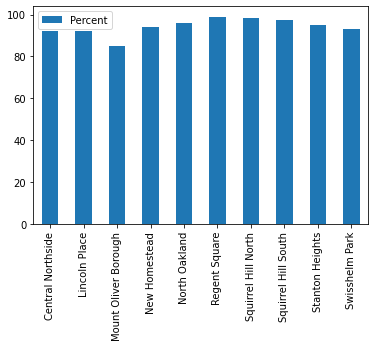

In [54]:
##Graph the final percentages
final_final_dict = pd.DataFrame.from_dict(final_dict, orient = 'index', columns = ['Percent'])
final_final_dict.plot(kind = 'bar', rot = 90)

In [56]:
##Get the neighborhood with the highest percentage
max_val = max(select_edu_levels.values())
for key, value in select_edu_levels.items():
    if(value == max_val):
        print("The best neighborhood in Pittsburgh is: " + key)

The best neighborhood in Pittsburgh is: Regent Square


#### Conclusion

Noah Martino: I was born and raised in the Pittsburgh area. I come from the east, in a suburb called North Versailles. I am familiar with most of the areas that we came up with including Regent Square. While I personally think Squirrel Hill or Oakland are more likely top candidates in my own personal opinion, I think that Regent Square is a very nice area as well, and if the data agrees, I can't disagree. I think we picked good databases and have a sound analysis method. 

Parth Shah: I generally agree with this data. While I have not been to Regent Square myself based on what I have heard from others and seen on Google Maps Street View, it seems like a very nice neighborhood. I think our metrics worked well to determine the best neighborhood in the city of Pittsburgh.

Brian Dembinsky: